In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from scipy.optimize import brentq
from scipy.special import perm,comb
import time
import pandas as pd

**6.2**

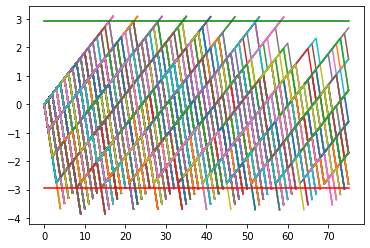

66 34 900


In [2]:
nmax=75
thetaR=0.75
thetaM=0.9
logA=np.log(1/19)
logB=np.log(19)

Z=lambda theta: np.random.choice([np.log(thetaM/thetaR),np.log((1-thetaM)/(1-thetaR))],p=[theta,1-theta])

N=1000
arrive=0
upper=0
lower=0
I=nmax*np.ones(N)
for k in range(N):
    X=np.zeros(nmax+1)
    for i in range(nmax):
        X[i+1]=X[i]+Z(thetaR)
        if X[i+1]<logA or X[i+1]>logB:
            I[k]=i+1
            break
            
    if X[i+1]<logA:
        lower+=1
            
    elif X[i+1]>logB:
        upper+=1
    else:
        arrive+=1
    
    plt.plot(np.arange(i+2),X[:i+2])

plt.plot([0,nmax],[logB,logB],c='g')
plt.plot([0,nmax],[logA,logA],c='r')
plt.show()
print(arrive,upper,lower)

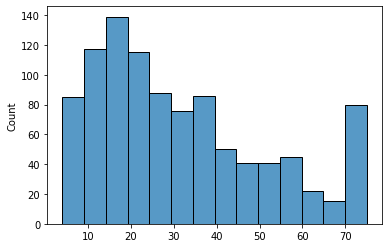

In [3]:
sb.histplot(I)
plt.show()

**6.4**

In [4]:
alpha=1.5
p=lambda X: np.array([2*X[0]**alpha,X[1]**alpha])/(2*X[0]**alpha+X[1]**alpha)
Z=lambda X: np.random.choice([0,1],p=p(X))
T=1000

N=1000
winR=0
winB=0
for k in range(N):
    X=np.ones(2)
    for t in range(T):
        X[Z(X)]+=1
        
    if X[0]>20*X[1]:
        winR+=1
    elif X[1]>20*X[0]:
        winB+=1

In [5]:
print(winR/N,winB/N,(N-winR-winB)/N)

0.814 0.101 0.085


**6.8**

In [6]:
def BB_params(m,s):
    u=np.int64(-1*np.ones(m))
    v=np.int64(-1*np.ones(m))
    a=np.zeros(m)
    b=np.zeros(m)
    w=np.zeros(m)
    for j in range(m):
        sub=s[:j][s[:j]<s[j]]
        u[j]=-1 if len(sub)==0 else np.argmax(s[:j]==np.max(sub))
        sub=s[:j][s[:j]>s[j]]
        v[j]=-1 if len(sub)==0 else np.argmax(s[:j]==np.min(sub))
        if u[j]>=0 and v[j]>=0:
            l=s[u[j]]
            r=s[v[j]]
            a[j]=(r-s[j])/(r-l)
            b[j]=(s[j]-l)/(r-l)
            w[j]=np.sqrt((s[j]-l)*(r-s[j])/(r-l))
        elif u[j]>=0:
            l=s[u[j]]
            a[j]=1
            w[j]=np.sqrt(s[j]-l)
        elif v[j]>=0:
            r=s[v[j]]
            b[j]=s[j]/r
            w[j]=np.sqrt(s[j]*(r-s[j])/r)
        else:
            w[j]=np.sqrt(s[j])
            
    return u,v,a,b,w

def BMviaBB(m,s,z,params):
    u,v,a,b,w=params
    B=np.zeros(m)
    for j in range(m):
        B[j]=w[j]*z[j]
        if u[j]>=0:
            B[j]+=a[j]*B[u[j]]
        
        if v[j]>=0:
            B[j]+=b[j]*B[v[j]]
            
    return B

def third(m):
    s=uniform.rvs(size=m)
    params=BB_params(m,s)
    C=np.zeros((m,m))
    for i in range(m):
        z=np.zeros(m)
        z[i]=1
        C[i,:]=BMviaBB(m,s,z,params)
#         plt.plot(np.sort(s),C[i,np.argsort(s)])
        
#     plt.show()
    sigma=C.dot(C.T)
    E=0
    for i in range(m):
        for j in range(m):
            E+=sigma[i,j]-min(s[i],s[j])
    
    return E

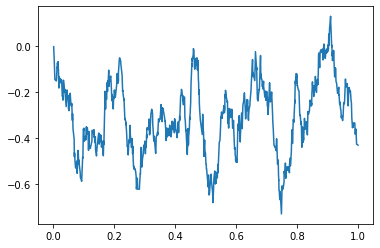

In [7]:
m=1000
s=uniform.rvs(size=m)
params=BB_params(m,s)
z=norm.rvs(size=m)
B=BMviaBB(m,s,z,params)

plt.plot(np.sort(s),B[np.argsort(s)])
plt.show()

In [8]:
N=100
E=np.zeros(N)
for i in range(N):
    E[i]=third(40)
    
print(max(E))

-327.2285669017544


**6.10**

In [9]:
S0=1
delta=0.035
sigma=0.25
N=257
t=np.linspace(0,1,N)
params=BB_params(N,t)

def GeoB():
    z=norm.rvs(size=N)
    B=BMviaBB(N,t,z,params)
    S=S0*np.exp((delta-sigma**2/2)*t+sigma*B)
    return S

In [10]:
num=1000
a=np.zeros(num)
b=np.zeros(num)
c=np.zeros(num)
d=np.zeros(num)
e=np.zeros(num)
f=np.zeros(num)
g=np.zeros(num)
for k in range(k):
    S=GeoB()
    a[k]=np.max([np.mean(S[1:])-1,0])
    b[k]=np.max([np.mean(S[1:])-1.2,0])
    c[k]=np.max([1-np.mean(S[1:]),0])
    d[k]=np.max([S[-1]-1,0])*all(S[1:]>0.9)
    e[k]=np.max([1-np.mean(S[1:]),0])*(1-all(S[1:]<1.1))
    f[k]=np.max(np.maximum(S[1:]-1.1,0))
    g[k]=np.max(S[1:])-S[-1]

In [11]:
print(np.mean(a))
print(np.mean(b))
print(np.mean(c))
print(np.mean(d))
print(np.mean(e))
print(np.mean(f))
print(np.mean(g))

0.06805082778231787
0.011057231862539664
0.050185726328107604
0.0930275059983212
0.006975125386149322
0.14315226311619153
0.19351248093566478


**6.11**

In [12]:
m=1000
t=np.linspace(0,1,m)
params=BB_params(m,t)

N=2000
C=np.zeros([N,m])
for n in range(N):
    z1=norm.rvs(size=m)
    B1=BMviaBB(m,t,z1,params)
    z2=norm.rvs(size=m)
    B2=np.flipud(BMviaBB(m,t,z2,params))
    C[n,:]=B1+B2

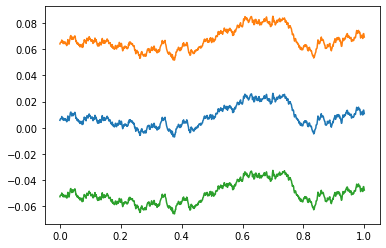

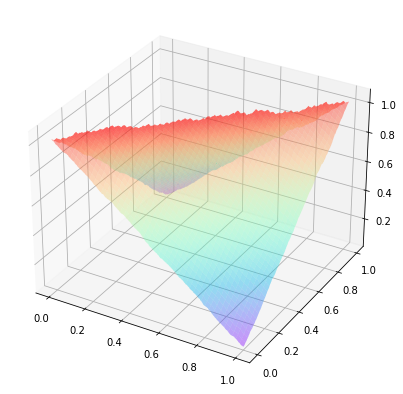

[[1.         0.02424667]
 [0.02424667 1.        ]]


In [13]:
plt.plot(t,C.mean(axis=0))
plt.plot(t,C.mean(axis=0)+2.58*C.std(axis=0)/np.sqrt(N))
plt.plot(t,C.mean(axis=0)-2.58*C.std(axis=0)/np.sqrt(N))
plt.show()

X,Y=np.meshgrid(t,t)
COV=np.cov(C.T)

plt.rcParams['figure.figsize']=(7,7)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,COV,alpha=0.4,cmap='rainbow')
plt.show()

print(np.corrcoef(C.T[[0,-1]]))

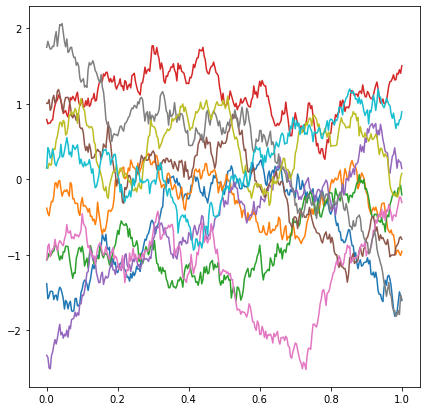

In [14]:
m=301
t=np.linspace(0,1,m)
params=BB_params(m,t)

N=10
for n in range(N):
    z1=norm.rvs(size=m)
    B1=BMviaBB(m,t,z1,params)
    z2=norm.rvs(size=m)
    B2=np.flipud(BMviaBB(m,t,z2,params))
    C=B1+B2
    plt.plot(t,C)

plt.show()

In [15]:
def conBMviaBB(m,s,z,params,Bint):
    u,v,a,b,w=params
    B=np.zeros(m)
    k=len(Bint)
    B[:k]=Bint
    for j in range(k,m):
        B[j]=w[j]*z[j]
        if u[j]>=0:
            B[j]+=a[j]*B[u[j]]
        
        if v[j]>=0:
            B[j]+=b[j]*B[v[j]]
            
    return B

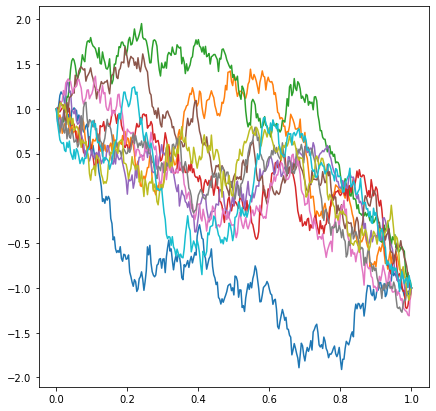

In [16]:
m=301
t=np.linspace(0,1-1/m,m-1)
t=np.append(1,t)
params=BB_params(m,t)

N=10
for n in range(N):
    z1=norm.rvs(size=m)
    B1=conBMviaBB(m,t,z1,params,[-1])[np.argsort(t)]
    z2=norm.rvs(size=m)
    B2=conBMviaBB(m,t,z2,params,[1])[np.argsort(t)]
    B2=np.flipud(B2)
    C=B1+B2
    plt.plot(np.sort(t),C)

plt.show()

**6.12**

In [17]:
beta1=4/5
beta2=6/7
R=2
Cs=R**(beta2/(beta2-beta1))
print(Cs)
R=1.1
Cs=R**(beta2/(beta2-beta1))
print(Cs)

32768.000000000524
4.177248169415665


In [18]:
beta1=2/3
beta2=4/5
R=2
Cs=R**(beta2/(beta2-beta1))
print(Cs)
R=1.1
Cs=R**(beta2/(beta2-beta1))
print(Cs)

63.999999999999844
1.7715610000000002


In [19]:
beta1=2/3
beta2=4/5
R=4
Cs=R**(beta2/(beta2-beta1))
print(Cs)
R=2.2
Cs=R**(beta2/(beta2-beta1))
print(Cs)

4095.99999999998
113.37990399999974


**6.13**

In [20]:
delta=0.05
sigma=0.4
N=1000
t=np.linspace(0,10,N+1)
dt=t.max()/N
params=BB_params(N+1,t)

times=100
So=np.ones([times,N+1])
Se=np.ones([times,N+1])
Sm=np.ones([times,N+1])
for i in range(times):
    Z=norm.rvs(size=N)
    B=BMviaBB(N+1,t,np.append(0,Z),params)
    So[i,:]=np.exp((delta-sigma**2/2)*t+sigma*B)
    for j in range(N):
        Se[i,j+1]=Se[i,j]+delta*Se[i,j]*dt+sigma*Se[i,j]*np.sqrt(dt)*Z[j]
        Sm[i,j+1]=Sm[i,j]+delta*Sm[i,j]*dt+sigma*Sm[i,j]*np.sqrt(dt)*Z[j]+0.5*sigma**2*Sm[i,j]*(Z[j]**2-1)*dt
        

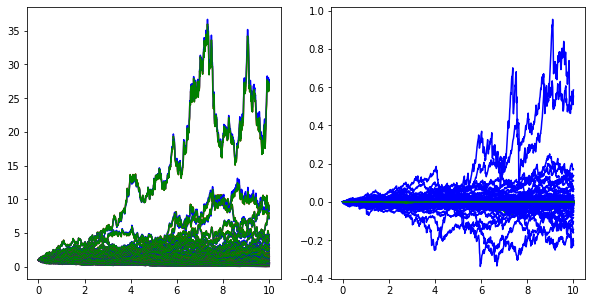

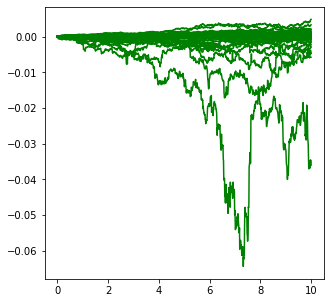

In [21]:
plt.rcParams['figure.figsize']=(10,5)
plt.subplot(121)
for i in range(times):
    plt.plot(t,So[i,:],c='r')
    plt.plot(t,Se[i,:],c='b')
    plt.plot(t,Sm[i,:],c='g')
    
plt.subplot(122)
for i in range(times):
    plt.plot(t,Se[i,:]-So[i,:],c='b')
    plt.plot(t,Sm[i,:]-So[i,:],c='g')
    
plt.show()

plt.rcParams['figure.figsize']=(5,5)
for i in range(times):
    plt.plot(t,Sm[i,:]-So[i,:],c='g')
    
plt.show()

**6.14**

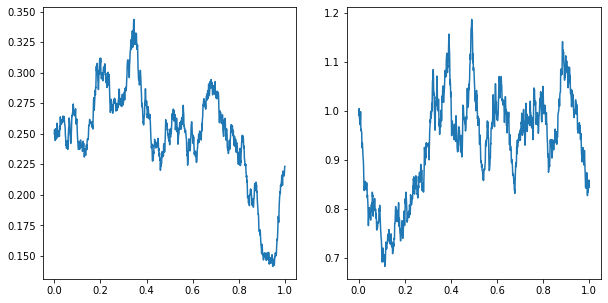

In [22]:
delta=0.03
k=0.8
theta=0.2
sigma=0.25
rho=-0.4
M=1000
t=np.linspace(0,1,M+1)
dt=t.max()/M
V=0.25*np.ones(M+1)
S=np.ones(M+1)
for n in range(M):
    Z1=norm.rvs(size=M)
    Z2=norm.rvs(size=M)
    V[n+1]=V[n]+k*(theta-V[n])*dt+sigma*np.sqrt(V[n]*dt)*Z1[n]+1/8*sigma**2*(Z1[n]**2-1)*dt
    V[n+1]=np.max([V[n+1],0])
    S[n+1]=S[n]+delta*S[n]*dt+S[n]*np.sqrt(V[n]*dt)*Z2[n]+0.5*V[n]*S[n]*(Z2[n]**2-1)*dt

plt.rcParams['figure.figsize']=(10,5)
plt.subplot(121)
plt.plot(t,V)
plt.subplot(122)
plt.plot(t,S)
plt.show()

In [23]:
times=100
S1=np.zeros(times)
for time in range(times):
    V=0.25*np.ones(M+1)
    S=np.ones(M+1)
    for n in range(M):
        Z1=norm.rvs(size=M)
        Z2=norm.rvs(size=M)
        V[n+1]=V[n]+k*(theta-V[n])*dt+sigma*np.sqrt(V[n]*dt)*Z1[n]+1/8*sigma**2*(Z1[n]**2-1)*dt
        V[n+1]=np.max([V[n+1],0])
        S[n+1]=S[n]+delta*S[n]*dt+S[n]*np.sqrt(V[n]*dt)*Z2[n]+0.5*V[n]*S[n]*(Z2[n]**2-1)*dt
    
    S1[time]=S[-1]

In [24]:
Y=np.exp(-delta)*np.maximum(0,S1-1.1)
print(np.mean(Y),np.mean(S1>1.1))

0.19034496223996936 0.4


**6.17**

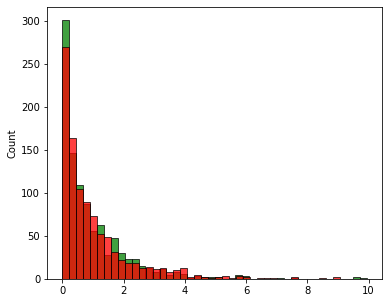

1.9797977201340895


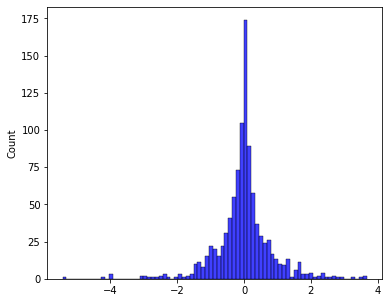

0.5229911279842109


In [25]:
lbd=0.5
N=1000
D=expon.rvs(size=N,scale=1/lbd)
X1p=uniform.rvs(size=N)*D
X1n=X1p-D
X1=np.array([X1p[i] if X1p[i]<=-X1n[i] else X1n[i] for i in range(N)])

plt.rcParams['figure.figsize']=(6,5)
sb.histplot(X1p,color='green')
sb.histplot(-X1n,color='red')
plt.show()
print(np.mean(X1p-X1n))

sb.histplot(X1,color='blue')
plt.show()
print(np.mean(np.abs(X1)))

**6.18**

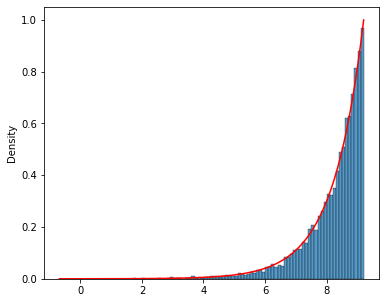

In [26]:
def PoiExp(N):
    Exp=expon.rvs(size=N)
    U=[np.sum(Exp[:i+1]) for i in range(N)]
    U=U-U[0]*uniform.rvs()
    T=np.log(U)
    return T

T=PoiExp(10000)
tmax=T.max()
tmin=T.min()
t=np.linspace(tmin,tmax,1000)

sb.histplot(T,stat='density')
plt.plot(t,np.exp(t)/(np.exp(tmax)-np.exp(tmin)),c='r')
plt.show()

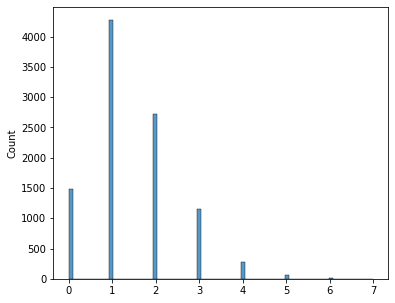

In [27]:
N=10000
Y=np.zeros(N)
for i in range(N):
    Y[i]=np.sum(PoiExp(100)<0)
    
sb.histplot(Y)
plt.show()

**6.20**

178


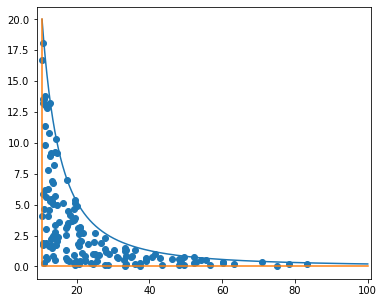

In [28]:
def Zipf_Poi(N,alpha,k):
    mu=N/((alpha-1)*k**(alpha-1))
    num=poisson.rvs(mu=mu)
    print(num)
    U=uniform.rvs(size=2*num)
    X=k/(U[:num]**(1/(alpha-1)))+0.5
    Z=N*(X-0.5)**(-alpha)*U[num:]
    return X,Z

N=2000
alpha=2
k=10
X,Z=Zipf_Poi(N,alpha,k)
x=np.linspace(k+0.5,100,1000)
plt.scatter(X,Z)
plt.plot(x,N*(x-0.5)**(-alpha))
plt.plot([k+0.5,k+0.5,100],[N*k**(-alpha),0,0])
plt.xlim(k-1,101)
plt.show()

**6.21**

99357


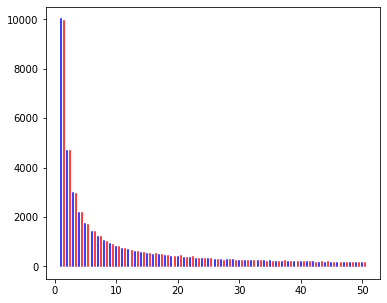

In [29]:
N=10000
alpha=1.1
k=1
X,Z=Zipf_Poi(N,alpha,k)
Y=np.floor(X+0.5)[Z<=N*np.floor(X+0.5)**(-alpha)]
Y=np.append(np.ones(poisson.rvs(mu=N)),Y)

for i in range(50):
    plt.plot([i+1,i+1],[0,N*(i+1)**(-alpha)],c='b')
    plt.plot([i+1.5,i+1.5],[0,np.sum(Y==i+1)],c='r')
    
plt.show()

**6.22**

In [30]:
df=pd.read_csv('data/ch6.6.22.csv')
traffic=df['traffic'].values

def simu_traf(intensity):
    result=[]
    for i in range(traffic.size):
        N=poisson.rvs(mu=intensity*traffic[i])
        cars=uniform.rvs(size=N,loc=0.25*i,scale=0.25)
        result=np.append(result,cars)
        
    return result

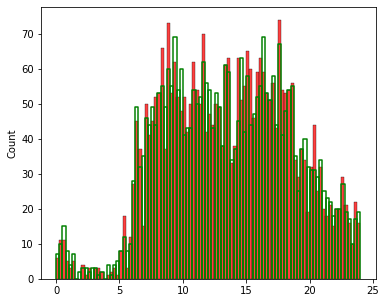

In [31]:
for i in range(traffic.size):
    plt.plot([0.25*i,0.25*i,0.25*(i+1),0.25*(i+1)],[0,traffic[i],traffic[i],0],c='g')

sb.histplot(simu_traf(1),bins=96,color='red')
plt.show()

3852.0 3851.006


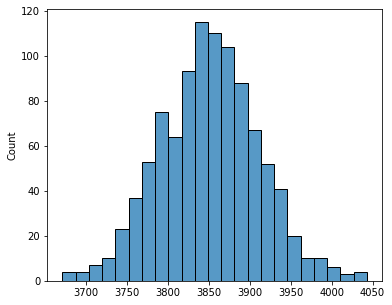

In [32]:
N=1000
Y=[]
for n in range(N):
    Y.append(simu_traf(1.2).size)
    
print(1.2*traffic.sum(),sum(Y)/N)
sb.histplot(Y)
plt.show()

In [33]:
N=1000
Y=0
for n in range(N):
    tmp=np.sort(simu_traf(1.2))
    Y+=tmp[999] if tmp.size>=1000 else 24
    
print(Y/N)

9.701785251339084


In [34]:
N=1000
Y=0
for n in range(N):
    tmp=simu_traf(1.2)
    Y+=((1.5<tmp)&(tmp<1.75)).sum()
    
print(Y/N)

0.0


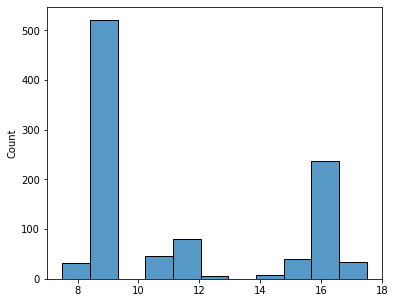

In [35]:
N=1000
Y=[]
time=np.arange(0,23.25,0.25)
for n in range(N):
    tmp1=simu_traf(1.2)
    tmp2=np.array([((tmp1>=t)&(tmp1<t+1)).sum() for t in time])
    Y.append(time[tmp2==tmp2.max()][0])
    
sb.histplot(Y)
plt.show()

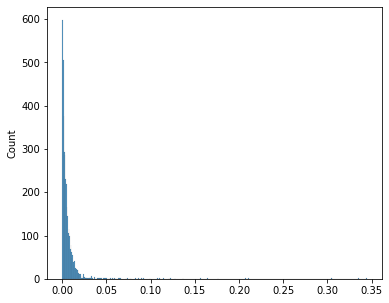

In [36]:
Y=np.sort(simu_traf(1.2))
sb.histplot(Y[1:]-Y[:-1])
plt.show()

**6.24**

In [37]:
def cox(lbd0,mu,var,rho):
    tmp=np.sqrt(var)
    size=poisson.rvs(mu=100*var*lbd0)
    U1=10*tmp*uniform.rvs(size=size)-5*tmp
    U2=10*tmp*uniform.rvs(size=size)-5*tmp
    Sigma=var*np.array([[1,rho],[rho,1]])
    N=poisson.rvs(size=size,mu=mu)
    Ncum=np.append(0,np.cumsum(N))
    T=np.zeros([np.sum(N),2])
    for i in range(size):
        T[Ncum[i]:Ncum[i+1]]=multi_norm.rvs(size=N[i],mean=[U1[i],U2[i]],cov=Sigma)
    
    seeds=np.array([U1,U2]).T
    Tlim=T[(T[:,0]>-1)&(T[:,1]>-1)&(T[:,0]<1)&(T[:,1]<1)]
    return Tlim,seeds,T

def K(Tlim,T,h,lbd):
    re=0
    for t in Tlim:
        re+=np.sum(np.sum((t-T)**2,axis=1)<h**2)
        
    return re/(lbd*Tlim.shape[0])

404 40369 1621


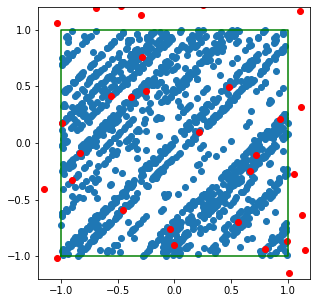

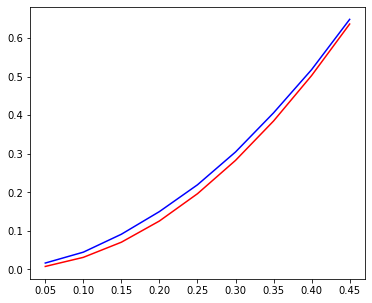

In [38]:
lbd0=4
mu=100
var=1
rho=1
Tlim,seeds,T=cox(lbd0,mu,var,rho)
print(seeds.shape[0],T.shape[0],Tlim.shape[0])
plt.plot([-1,1,1,-1,-1],[-1,-1,1,1,-1],c='g')
plt.scatter(Tlim[:,0],Tlim[:,1])
plt.scatter(seeds[:,0],seeds[:,1],c='r')
plt.axis('scaled')
plt.xlim([-1.2,1.2])
plt.ylim([-1.2,1.2])
plt.show()

lbd=lbd0*mu
H=np.linspace(0.05,0.45,9)
Y=np.zeros(9)
for i in range(9):
    Y[i]=K(Tlim,T,H[i],lbd)
    
plt.plot(H,np.pi*H**2,c='r')
plt.plot(H,Y,c='b')
plt.show()

**6.25**

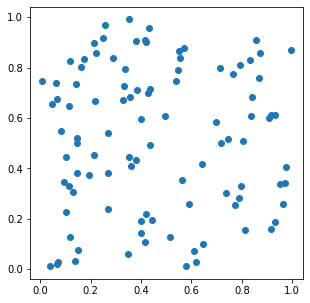

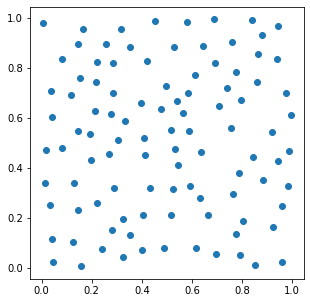

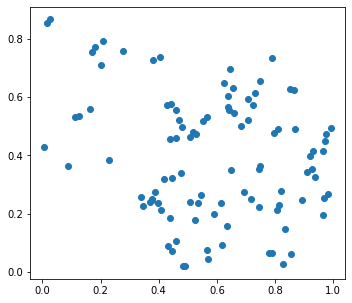

In [39]:
N=100

U=np.array([uniform.rvs(size=2) for i in range(N)])
plt.scatter(U[:,0],U[:,1])
plt.axis('scaled')
plt.show()

k=10
U=np.array([uniform.rvs(size=2)])
for n in range(N):
    tmp=np.array([uniform.rvs(size=k),uniform.rvs(size=k)]).T
    dist=np.array([np.sum((u-U)**2,axis=1).min() for u in tmp])
    U=np.vstack([U,tmp[dist==dist.max()]])
    
plt.scatter(U[:,0],U[:,1])
plt.axis('scaled')
plt.show()

k=3
U=np.array([uniform.rvs(size=2)])
for n in range(N):
    tmp=np.array([uniform.rvs(size=k),uniform.rvs(size=k)]).T
    dist=np.array([np.sum((u-U)**2,axis=1).min() for u in tmp])
    U=np.vstack([U,tmp[dist==dist.min()]])
    
plt.scatter(U[:,0],U[:,1])
plt.axis('scaled')
plt.show()

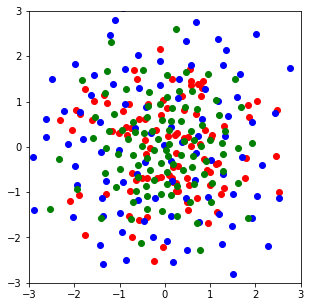

In [40]:
N=100

U=multi_norm.rvs(size=N+1,mean=[0,0])
plt.scatter(U[:,0],U[:,1],c='r')
plt.axis('scaled')
plt.xlim([-3,3])
plt.ylim([-3,3])

k=20
U=[multi_norm.rvs(mean=[0,0])]
for n in range(N):
    tmp=multi_norm.rvs(size=k,mean=[0,0])
    dist=np.array([np.sum((u-U)**2,axis=1).min() for u in tmp])
    U=np.vstack([U,tmp[dist==dist.max()]])
    
plt.scatter(U[:,0],U[:,1],c='b')
plt.axis('scaled')
plt.xlim([-3,3])
plt.ylim([-3,3])

k=20
U=[multi_norm.rvs(mean=[0,0])]
for n in range(N):
    tmp=multi_norm.rvs(size=k,mean=[0,0])
    dist=np.array([np.sum((u-U)**2,axis=1).min() for u in tmp])
    dist=dist*multi_norm.pdf(tmp,mean=[0,0])
    U=np.vstack([U,tmp[dist==dist.max()]])
    
plt.scatter(U[:,0],U[:,1],c='g')
plt.axis('scaled')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.show()

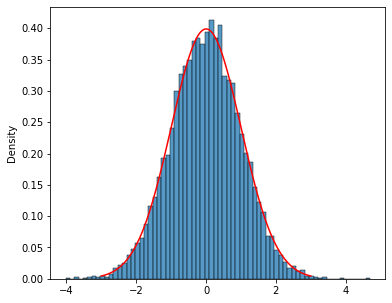

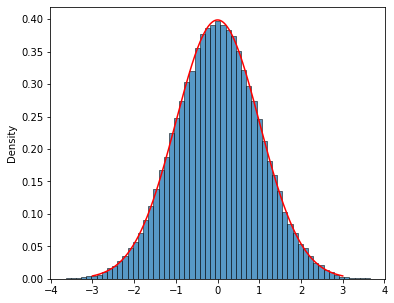

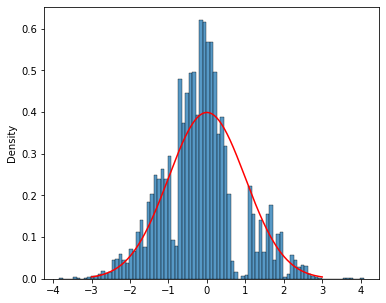

In [41]:
N=10000

x=np.linspace(-3,3,1000)
plt.plot(x,norm.pdf(x),c='r')
U=norm.rvs(size=N+1)
sb.histplot(U,stat='density')
plt.show()

k=10
U=[norm.rvs()]
for n in range(N):
    tmp=norm.rvs(size=k)
    dist=np.array([np.abs(u-U).min() for u in tmp])
    dist=dist*norm.pdf(tmp)
    U=np.append(U,tmp[dist==dist.max()])
    
x=np.linspace(-3,3,1000)
plt.plot(x,norm.pdf(x),c='r')
sb.histplot(U,stat='density')
plt.show()

k=3
U=[norm.rvs()]
for n in range(N):
    tmp=norm.rvs(size=k)
    dist=np.array([np.abs(u-U).min() for u in tmp])
    dist=dist*norm.pdf(tmp)
    U=np.append(U,tmp[dist==dist.min()])
    
x=np.linspace(-3,3,1000)
plt.plot(x,norm.pdf(x),c='r')
sb.histplot(U,stat='density')
plt.show()

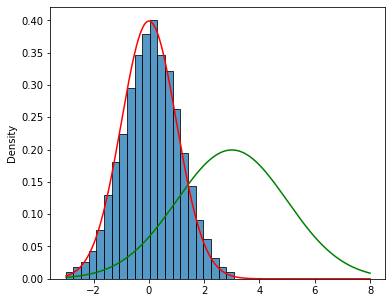

In [42]:
N=1000
k=100
U=[norm.rvs(loc=3,scale=2)]
for n in range(N):
    tmp=norm.rvs(size=k,loc=3,scale=2)
    dist=np.array([np.abs(u-U).min() for u in tmp])
    dist=dist*norm.pdf(tmp)
    U=np.append(U,tmp[dist==dist.max()])
    
x=np.linspace(-3,8,1000)
plt.plot(x,norm.pdf(x,loc=3,scale=2),c='g')
plt.plot(x,norm.pdf(x),c='r')
sb.histplot(U,stat='density')
plt.show()

**6.27**

In [43]:
def Chinese(G,alpha,size):
    X=[G()]
    for i in range(size-1):
        tmp=np.append(X,G())
        p=1/(alpha+i+1)*np.ones(i+2)
        p[-1]*=alpha
        X.append(np.random.choice(tmp,p=p))
        
    tmp=np.array([X[0]])
    Y=np.zeros(len(set(X)))
    for x in X:
        if x not in tmp:
            tmp=np.append(tmp,x)
            
        Y[np.arange(tmp.size)[tmp==x]]+=1
    
    return Y

In [44]:
G=uniform.rvs
alpha=3
size=1000
print(Chinese(G,alpha,size))

[325.  26. 175. 161.  89.  36.  14.  39.  63.  32.   9.   5.   8.   4.
   1.   3.   6.   1.   2.   1.]


In [45]:
N=100
Y=0
for i in range(N):
    Y+=Chinese(G,alpha,size).max()
    
print(Y/N)

386.37


**6.28**

In [46]:
def PitYor(G,alpha,d,size):
    Y=np.array([G()])
    c=np.array([1])
    t=1
    X=Y
    for i in range(size-1):
        p=np.append(c-d,alpha+d*t)/(alpha+c.sum())
        J=np.random.choice(np.arange(0,t+1),p=p)
        if J==t:
            Y=np.append(Y,G())
            c=np.append(c,0)
            t+=1
            
        c[J]+=1
        X=np.append(X,Y[J])
        
    return c,Y,X,t

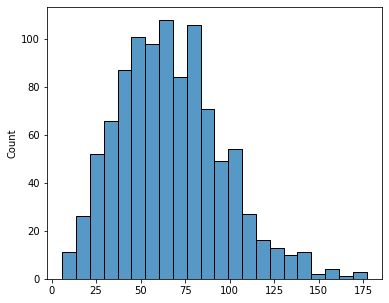

In [47]:
G=uniform.rvs
alpha=1
d=0.5
size=1000
N=1000
out=[]
for i in range(N):
    c,Y,X,t=PitYor(G,alpha,d,size)
    out.append(t)
    
sb.histplot(out)
plt.show()

**6.29**

In [48]:
def LV(V,A,x0,N,Tmax):
    T=np.zeros(N+1)
    X=np.zeros([N+1,len(x0)])
    X[0]=x0
    for n in range(N):
        a=A(X[n])
        if np.sum(a)>0 and T[n]<Tmax:
            dT=expon.rvs(scale=1/np.sum(a))
            dX=V[np.random.choice(np.arange(V.shape[0]),p=a/np.sum(a))]
        else:
            T=T[0:n+1]
            X=X[0:n+1]
            print(n+1)
            break
            
        T[n+1]=T[n]+dT
        X[n+1]=X[n]+dX
        
    return X,T

In [49]:
V=np.array([[1,0],[-1,1],[0,-1]])
c=[10,0.01,10]
A=lambda x: np.array([c[0]*x[0],c[1]*x[0]*x[1],c[2]*x[1]])
x0=[1000,1000]
N=1000000
Tmax=10
X,T=LV(V,A,x0,N,Tmax)

300150


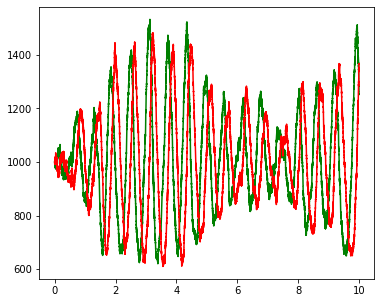

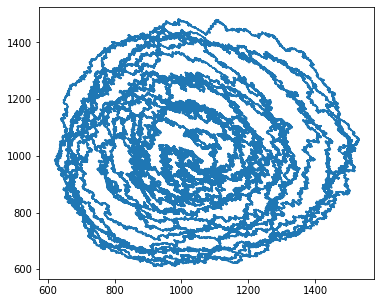

In [50]:
plt.plot(T,X[:,0],c='g')
plt.plot(T,X[:,1],c='r')
plt.show()

plt.plot(X[:,0],X[:,1])
plt.show()

**6.30**

In [51]:
V=np.array([[1,-1,0],[0,1,-1],[-1,0,1]])
c=[1.1,1,1]
A=lambda x: np.array([c[0]*x[0]*x[1],c[1]*x[1]*x[2],c[2]*x[2]*x[0]])
x0=[1000,1000,1000]
N=1000000
Tmax=100
X,T=LV(V,A,x0,N,Tmax)

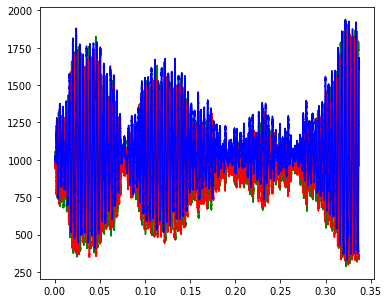

[ 960.  358. 1682.]


In [52]:
plt.plot(T,X[:,0],c='g')
plt.plot(T,X[:,1],c='r')
plt.plot(T,X[:,2],c='b')
plt.show()
print(X[-1,:])

**6.32**

In [53]:
V=np.array([[1,0,0],[-1,1,0],[0,-1,0],[0,-1,0],[0,0,1]])
c=[10,0.01,10,0.01,1100,1]
A=lambda x: np.array([c[0]*x[0],c[1]*x[0]*x[1],c[2]*x[1],c[3]*x[1]*x[2],c[5]*np.max([x[1]-c[4],0])])
x0=[1000,1000,0]
N=1000000
Tmax=20
X,T=LV(V,A,x0,N,Tmax)

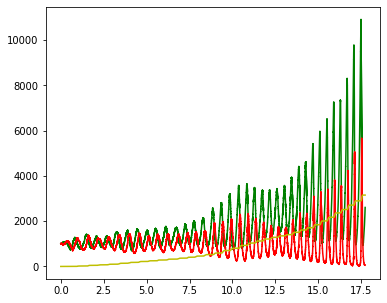

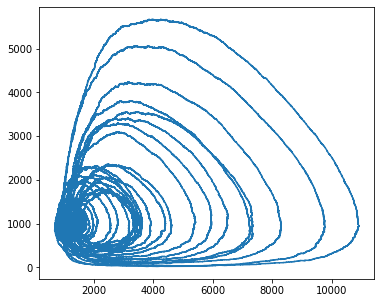

[2606.   48. 3152.]


In [54]:
plt.plot(T,X[:,0],c='g')
plt.plot(T,X[:,1],c='r')
plt.plot(T,X[:,2],c='y')
plt.show()

plt.plot(X[:,0],X[:,1])
plt.show()
print(X[-1,:])